<a href="https://colab.research.google.com/github/shaiksajid45/SQL/blob/main/Pandas_Matplotlib.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [12]:
import pandas as pd
import matplotlib.pyplot as plt

In [13]:
url = "https://raw.githubusercontent.com/datasets/covid-19/master/data/countries-aggregated.csv"
df = pd.read_csv(url)

In [ ]:
df.tail()

,Date,Country,Confirmed,Recovered,Deaths
161563,2022-04-12,Zimbabwe,247094,0,5460
161564,2022-04-13,Zimbabwe,247160,0,5460
161565,2022-04-14,Zimbabwe,247208,0,5462
161566,2022-04-15,Zimbabwe,247237,0,5462
161567,2022-04-16,Zimbabwe,247237,0,5462


In [14]:
p=df['Country'].value_counts()
print(161567//816+1)
q=df['Country'].nunique()
print(q)

198
198


In [ ]:
first_rows = df.groupby('Country').first()
print(first_rows)

                            Date  Confirmed  Recovered  Deaths
Country                                                       
Afghanistan           2020-01-22          0          0       0
Albania               2020-01-22          0          0       0
Algeria               2020-01-22          0          0       0
Andorra               2020-01-22          0          0       0
Angola                2020-01-22          0          0       0
...                          ...        ...        ...     ...
West Bank and Gaza    2020-01-22          0          0       0
Winter Olympics 2022  2020-01-22          0          0       0
Yemen                 2020-01-22          0          0       0
Zambia                2020-01-22          0          0       0
Zimbabwe              2020-01-22          0          0       0

[198 rows x 4 columns]


In [ ]:
k=df['Date'].min()
p=df['Date'].max()
print(f"Start Date: {k}")
print(f"End Date: {p}")

Start Date: 2020-01-22
End Date: 2022-04-16


In [ ]:
Afghanistan_data=df[df['Country']=='Afghanistan']
print(Afghanistan_data)

           Date      Country  Confirmed  Recovered  Deaths
0    2020-01-22  Afghanistan          0          0       0
1    2020-01-23  Afghanistan          0          0       0
2    2020-01-24  Afghanistan          0          0       0
3    2020-01-25  Afghanistan          0          0       0
4    2020-01-26  Afghanistan          0          0       0
..          ...          ...        ...        ...     ...
811  2022-04-12  Afghanistan     178257          0    7676
812  2022-04-13  Afghanistan     178295          0    7676
813  2022-04-14  Afghanistan     178352          0    7676
814  2022-04-15  Afghanistan     178373          0    7676
815  2022-04-16  Afghanistan     178387          0    7676

[816 rows x 5 columns]


Chat GPT Workbook

In [ ]:
print(df.shape)
print(df.columns)

(161568, 5)
Index(['Date', 'Country', 'Confirmed', 'Recovered', 'Deaths'], dtype='object')


In [ ]:
df['Date']=pd.to_datetime(df['Date'])
type(df['Date'])

pandas.core.series.Series

In [ ]:
Zimbabwe_Data=df[df['Country']=='Zimbabwe']
print(f"Total Death toll in Zimbabwe: {Zimbabwe_Data['Deaths'].max()}")
print(f"Total Confirmed Cases in Zimbabwe: {Zimbabwe_Data['Confirmed'].max()}")
a=df['Date'].min()
b=df['Date'].max()
k=(b-a).days
print(f"Cases arising per day: {Zimbabwe_data['Confirmed'].max()/k}")

Total Death toll in Zimbabwe: 5462
Total Confirmed Cases in Zimbabwe: 247237
Cases arising per day: 303.35828220858895
8.0


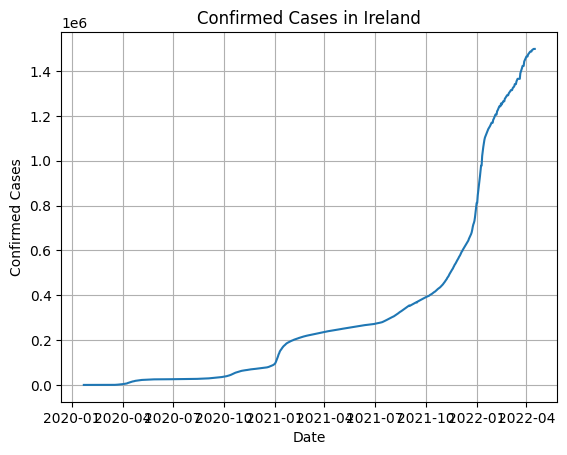

In [ ]:
import matplotlib.pyplot as plt
Ireland_data=df[df['Country']=='Ireland']
plt.plot(Ireland_data['Date'],Ireland_data['Confirmed'])
plt.xlabel('Date')
plt.ylabel('Confirmed Cases')
plt.title('Confirmed Cases in Ireland')
plt.grid(True)
plt.show()

Handling Missing values

In [ ]:
print(df[df.isnull().any(axis=1)])

Empty DataFrame
Columns: [Date, Country, Confirmed, Recovered, Deaths]
Index: []


In [ ]:
g=dict(df.groupby('Country')['Confirmed'].max())
k=max(g.values())
for i,j in g.items():
  if j==k:
    print(f"Country with maximum confirmed cases: {i}")

Country with maximum confirmed cases: US


In [ ]:
k=df.groupby('Country')['Confirmed'].max()
k.sort_values(ascending=False,inplace=True)
k

,Confirmed
Country,
US,80625120
India,43042097
Brazil,30250077
France,27874269
Germany,23416663
...,...
Holy See,29
Antarctica,11
MS Zaandam,9


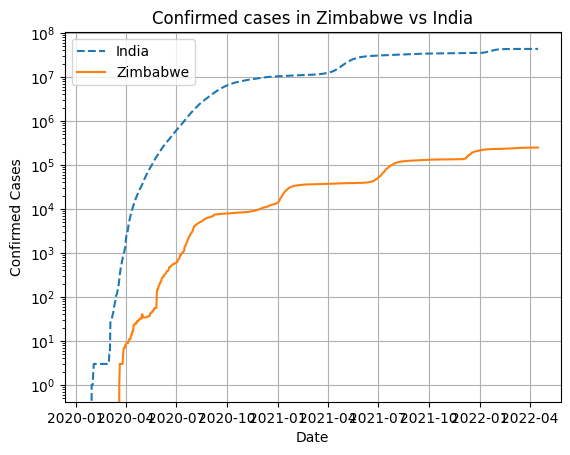

43042097 247237


In [ ]:
import matplotlib.pyplot as plt
Zimbabwe_data=df[df['Country']=='Zimbabwe']
India_data=df[df['Country']=='India']
plt.plot(India_data['Date'], India_data['Confirmed'], linestyle='--')
plt.plot(Zimbabwe_data['Date'], Zimbabwe_data['Confirmed'], linestyle='-')
plt.xlabel('Date')
plt.ylabel('Confirmed Cases')
plt.title('Confirmed cases in Zimbabwe vs India')
plt.legend(['India', 'Zimbabwe'])
plt.yscale('log')
plt.grid(True)
plt.show()
i=India_data['Confirmed'].max()
j=Zimbabwe_data['Confirmed'].max()
print(i,j)

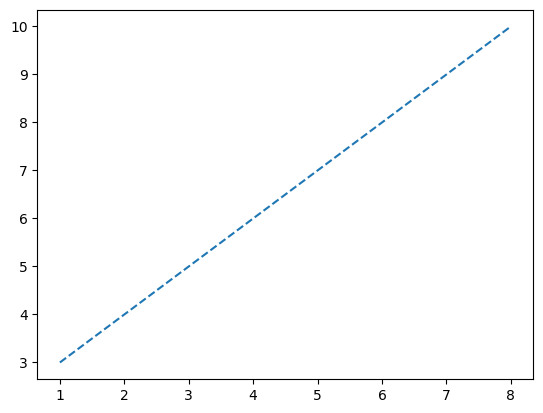

In [11]:
import numpy as np

xpoints = np.array([1, 8])
ypoints = np.array([3, 10])

plt.plot(xpoints, ypoints)
plt.show()

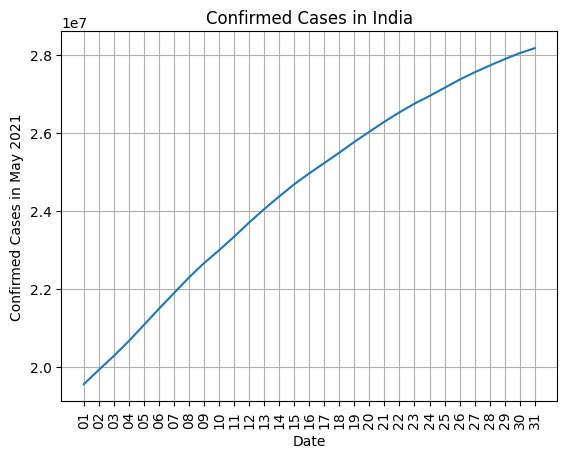

In [35]:
import matplotlib.dates as mdates
x=df[df['Country']=='India']
start_date='2021-05-01'
end_date='2021-05-31'
x=x[(x['Date']>=start_date) & (x['Date']<=end_date)]
plt.plot(x['Date'],x['Confirmed'])
plt.xlabel('Date')
plt.ylabel('Confirmed Cases in May 2021')
plt.title('Confirmed Cases in India')
plt.grid(True)
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%d'))
plt.xticks(rotation=90)
plt.show()

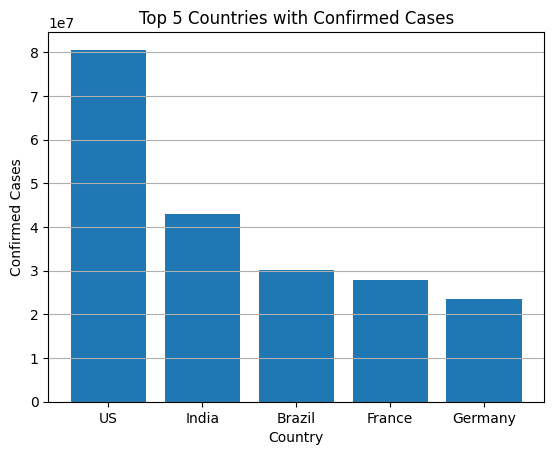

In [45]:
x=df.groupby('Country')['Confirmed'].max()
x.sort_values(ascending=False,inplace=True)
x=x[:5]
plt.bar(x.index[:5],x.values[:5])
plt.xlabel('Country')
plt.ylabel('Confirmed Cases')
plt.title('Top 5 Countries with Confirmed Cases')
plt.grid(axis='y')
plt.show()